In [1]:
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from matplotlib import pyplot
%matplotlib inline  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Nacimiento Niñas

## Análisis de Serie de Tiempo: Nacimientos Diarios de Niñas 👶📊

Se realizó un análisis exploratorio de una serie de tiempo que representa el número de nacimientos diarios de niñas a lo largo de un período de tiempo específico. La serie de tiempo se ha cargado desde el archivo 'daily-total-female-births.csv' y se encuentra en un DataFrame llamado 'series'.

**Objetivos:**
- Comprender la estructura y las características de la serie de tiempo.
- Identificar patrones, tendencias y estacionalidad en los datos.
- Evaluar la estacionariedad de la serie de tiempo.
- Realizar visualizaciones significativas para comunicar los hallazgos.

**Pasos del Análisis Exploratorio:**
1. Cargar los datos y ver las primeras filas.
2. Calcular un resumen estadístico básico de la serie.
3. Visualizar la serie de tiempo para identificar patrones.
4. Generar un histograma y KDE para comprender la distribución de los datos.
5. Analizar la autocorrelación y evaluar la estacionariedad de la serie.
6. Realizar un desglose de la serie en componentes de tendencia y estacionalidad (si es necesario).

Este análisis exploratorio servirá como base para futuros análisis y modelado de la serie de tiempo. ¡Comencemos explorando los datos y descubriendo información valiosa sobre los nacimientos diarios de mujeres!


In [3]:
series = pd.read_csv('daily-total-female-births.csv', header=0,index_col=0)
print(series.head())

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


**Paso 1: Resumen estadístico básico**

In [4]:
print(series.describe())

           Births
count  365.000000
mean    41.980822
std      7.348257
min     23.000000
25%     37.000000
50%     42.000000
75%     46.000000
max     73.000000


**Paso 3: Visualización de la serie de tiempo**

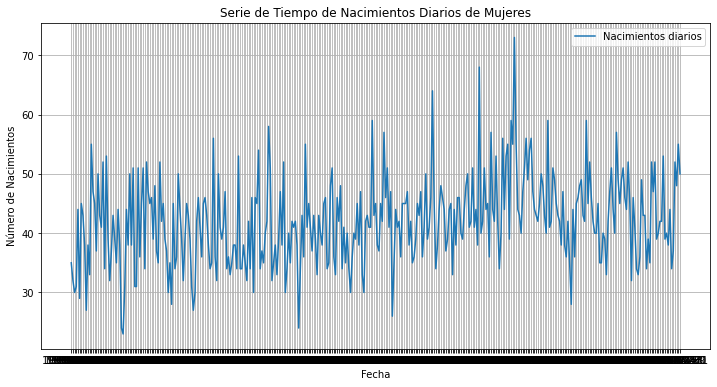

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(series.index, series['Births'], label='Nacimientos diarios')
plt.title('Serie de Tiempo de Nacimientos Diarios de Mujeres')
plt.xlabel('Fecha')
plt.ylabel('Número de Nacimientos')
plt.legend()
plt.grid(True)
plt.show()

**Paso 4: Histograma y KDE (Kernel Density Estimation)**

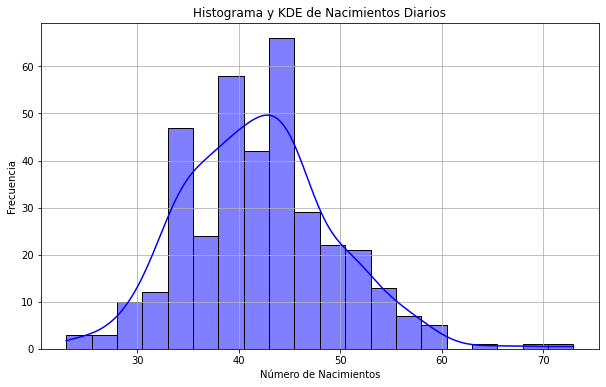

In [6]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(series['Births'], kde=True, color='blue')
plt.title('Histograma y KDE de Nacimientos Diarios')
plt.xlabel('Número de Nacimientos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

**Paso 5: Box Plot** 

Un diagrama de caja (box plot) nos ayudará a identificar la presencia de valores atípicos y a comprender mejor la distribución de los nacimientos.

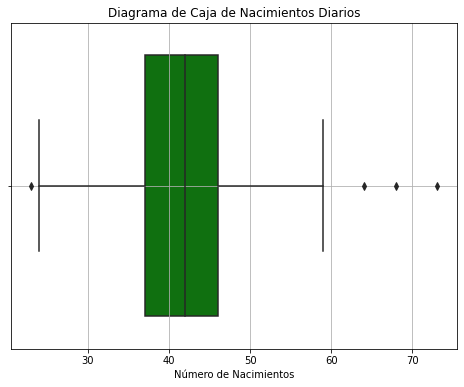

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=series['Births'], color='green')
plt.title('Diagrama de Caja de Nacimientos Diarios')
plt.xlabel('Número de Nacimientos')
plt.grid(True)
plt.show()

📊 **Interpretación**: El diagrama de caja muestra la mediana, los cuartiles y los posibles valores atípicos en la distribución de nacimientos diarios.

**Paso 6: Autocorrelación**

<Figure size 720x432 with 0 Axes>

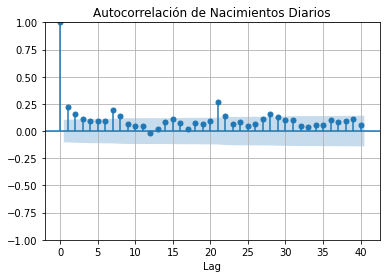

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(series['Births'], lags=40)
plt.title('Autocorrelación de Nacimientos Diarios')
plt.xlabel('Lag')
plt.grid(True)
plt.show()

📊 **Interpretación**: La gráfica de autocorrelación muestra la correlación entre la serie y sus retrasos (lags). Los picos significativos pueden indicar patrones estacionales.

**Paso 7: Tendencia y Estacionalidad**

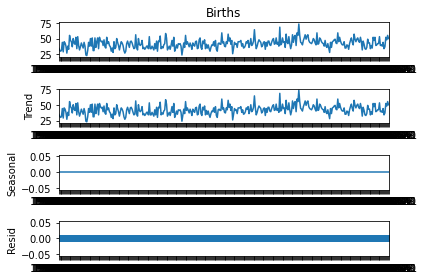

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(series['Births'], model='additive', period=1)
result.plot()
plt.show()

📊 **Interpretación**: La descomposición de la serie de tiempo nos permite identificar la tendencia y la estacionalidad en los datos.

**Paso 8: Prueba de Estacionariedad**

In [12]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series['Births'])
print('Estadísticas ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:', result[4])

Estadísticas ADF: -4.808291253559764
Valor p: 5.2434129901498554e-05
Valores críticos: {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}


### Conclusiones del Análisis Exploratorio de la Serie de Tiempo de Nacimientos Diarios de Mujeres 📊👶

**Resumen Estadístico de la Serie de Tiempo:**
- Contamos con un total de 365 observaciones en la serie de tiempo de nacimientos diarios de mujeres.
- La media de nacimientos diarios es aproximadamente 41.98, con una desviación estándar de aproximadamente 7.35.
- El número mínimo de nacimientos diarios es 23, mientras que el máximo es 73.
- Los percentiles muestran que el 25% de los días tuvieron 37 o menos nacimientos, el 50% tuvo 42 o menos, y el 75% tuvo 46 o menos.

**Autocorrelación y Estacionariedad:**
- La prueba de estacionariedad (ADF) muestra un valor p extremadamente bajo (5.24e-05), lo que sugiere que la serie de tiempo es estacionaria. Esto indica que la serie no tiene una tendencia significativa.
- La gráfica de autocorrelación no muestra patrones claros de correlación en los retrasos, lo que sugiere que la serie puede no tener una fuerte componente estacional.

**Visualizaciones y Distribución:**
- El histograma y el KDE de los nacimientos diarios indican una distribución que podría aproximarse a una distribución normal, pero con algunos valores atípicos en la cola derecha.
- El diagrama de caja muestra que la mayoría de los valores están dentro de los límites del rango intercuartil (IQR), con algunos valores atípicos en la parte superior.

La serie de tiempo de nacimientos diarios de mujeres parece ser estacionaria y no muestra patrones de correlación fuertes en los retrasos. Sin embargo, la distribución de los datos tiene algunos valores atípicos en la cola derecha. Esto proporciona una visión general de los datos y será importante considerarlo al realizar análisis y modelado adicionales.
